In [32]:
#-*- coding: utf-8 -*-
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [33]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target

In [34]:
#划分测试集与训练集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
#标准化处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [36]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter_no_change = 10,eta0 = 0.1, random_state = 0)
ppn.fit(X_train_std,y_train)

Perceptron(eta0=0.1, n_iter_no_change=10)

In [37]:
y_pred = ppn.predict(X_test_std)
print('misclassified :%d'% (y_test != y_pred).sum())

misclassified :2


In [38]:
from sklearn.metrics import accuracy_score
print('accuracy_score:%.2f'% accuracy_score(y_test,y_pred))

accuracy_score:0.96


In [61]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
def plot_decision_regions(X,y,classifier,test_idx = None,resolution = 0.02):
    #初始化 markers 和 color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # 绘制决策边界
    x1_min ,x1_max = X[:,0].min() -1,X[:,0].max() +1
    x2_min, x2_max = X[:,1].min() -1,X[:,1].max() +1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))
    z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T) 
    z = z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,z, alpha = 0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    #绘制样本点
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl,0],y = X[y == cl,1], alpha = 0.8,
                    c = colors[idx], marker = markers[idx], label = cl)
    #高亮显示测试数据
    if test_idx:
        X_test,y_test = X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',
                    alpha=1.0,linewidth=1,marker = 'o',
                    s=55,label='test set',edgecolors = 'black')

<ipython-input-61-6f58a53cc93b>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:,0],X_test[:,1],c='',


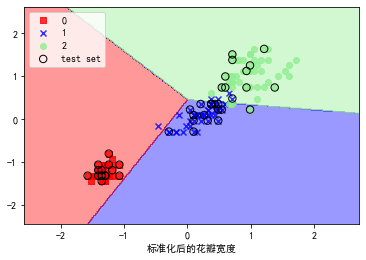

In [62]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))
plt.xlabel('标准化后的花瓣长度')
plt.xlabel('标准化后的花瓣宽度')
plt.legend(loc = 'upper left')
plt.show()